# Fourier transform

> Marcos Duarte  
> Laboratory of Biomechanics and Motor Control ([http://demotu.org/](http://demotu.org/))  
> Federal University of ABC, Brazil

In continuation to what we have saw about [Fourier series](http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/FourierSeries.ipynb), the [Fourier transform](http://en.wikipedia.org/wiki/Fourier_transform) is a mathematical transformation to transform functions between time (or spatial) domain and frequency domain. The process of transforming from time to frequency domain is called Fourier analysis, the inverse is the Fourier synthesis.

The Fourier transform of a continuous function $x(t)$ is by definition:

$$ X(f) = \int_{-\infty}^{\infty} x(t)\:\mathrm{e}^{-i2\pi ft} \:\mathrm{d}t $$

And the inverse Fourier transform is:

$$ x(t) = \int_{-\infty}^{\infty} X(f)\:\mathrm{e}^{\:i2\pi tf} \:\mathrm{d}f $$

## Discrete Fourier transform

For discrete data, $x$ with length $N$, its Discrete Fourier Transform (DFT) is another data $X$, also with length $N$ and elements:
            
$$ X[k] = \sum_{n=0}^{N-1}  x[n] \mathrm{e}^{-i2\pi kn/N} \;,\quad 0 \leq k \leq N-1 $$

The Inverse Discrete Fourier Transform (IDFT) inverts this operation and gives back the original data $x$:

$$ x[n] = \frac{1}{N} \sum_{k=0}^{N-1}  X[k] \mathrm{e}^{i2\pi kn/N} \;,\quad 0 \leq n \leq N-1 $$

The relationship between the DFT and the Fourier coefficients $a$ and $b$ in

$$ x[n] = a_0 + \sum_{k=1}^{N-1} a[k]\cos\left(\frac{2\pi kt[n]}{Ndt}\right)+b[k]\sin\left(\frac{2\pi kt[n]}{Ndt}\right) \;,\quad 0 \leq n \leq N-1 $$

is:

$$ \begin{array}{l}
a_0 = X[0]/N \\\
\\\
a[k] = \;\; \text{Real}(X[k+1])/N \\\
\\\
b[k] = -\text{Imag}(X[k+1])/N
\end{array} $$

Where $x$ is a length $N$ discrete signal sampled at times $t$ with spacing $dt$.

## Fast Fourier Transform (FFT)

The [FFT](http://en.wikipedia.org/wiki/Fast_Fourier_transform) is a fast algorithm to compute the DFT. Let's see how to use the FFT algorithm from `scipy.fftpack`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.insert(1, r'./../functions')

A sine wave with amplitude of 2, frequency of 5 Hz, and phase of 45$^o$ sampled at 100 Hz:

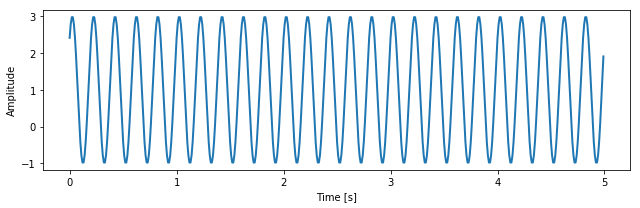

In [2]:
A = 2 # amplitude
freq = 5 # Hz
phase = np.pi/4 # radians (45 degrees)
fs = 100
dt = 1 / fs
time = np.arange(0, 500) / fs
x = A * np.sin(2 * np.pi * freq * time + phase) + 1
x = np.asarray(x)
N = x.shape[0]
t = np.arange(0, N) / fs

fig, ax = plt.subplots(1, 1, figsize=(9, 3))
ax.plot(time, x, linewidth=2)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')
fig.tight_layout()

Its FFT is simply:

In [3]:
from scipy.fftpack import fft, fftfreq, fftshift

X = fft(x, N)                      # FFT
freqs = fftfreq(N, dt)             # frequency values
amp = np.abs(X)/N                  # amplitude
phase = -np.imag(X)/N * 180/np.pi  # phase

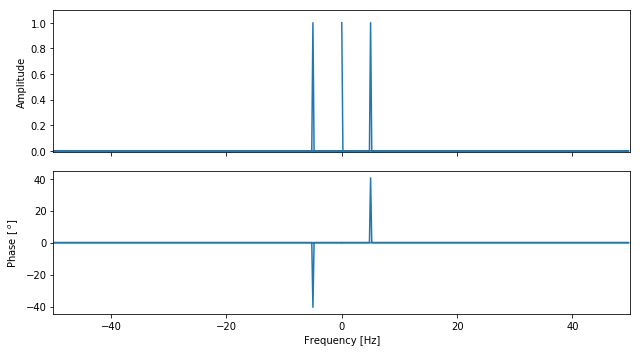

In [4]:
fig, ax = plt.subplots(2, 1, figsize=(9, 5), sharex=True)
ax[0].plot(freqs, amp)
ax[1].plot(freqs, phase)
ax[0].set_ylabel('Amplitude')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].set_ylabel('Phase $[\;^o]$')
ax[0].set_ylim(-.01, 1.1)
ax[1].set_xlim(-50, 50)
fig.tight_layout()

For real signals, the FFT values are the same for negative and positive frequencies and the phase is negated if the signal is odd and the same if the signal is even. Because that, we usually don't care about the negative frequencies and plot only the FFT for the positive frequencies:

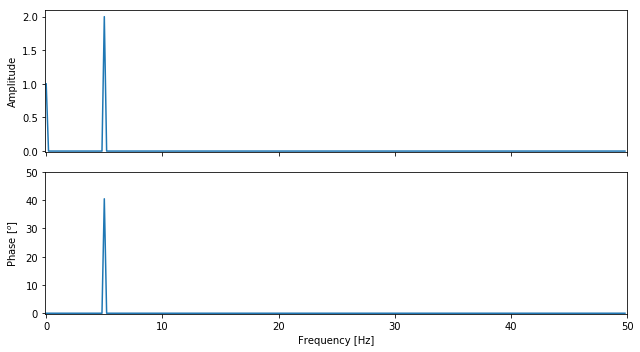

In [6]:
freqs2 = freqs[:int(np.floor(N/2))]
amp2 = amp[:int(np.floor(N/2))]      # amplitude
amp2[1:] = 2*amp2[1:]                # DC component appears only once
phase2 = phase[:int(np.floor(N/2))]  # phase

fig, ax = plt.subplots(2, 1, figsize=(9, 5), sharex=True)
ax[0].plot(freqs2, amp2)
ax[1].plot(freqs2, phase2)
ax[0].set_ylabel('Amplitude')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].set_ylabel('Phase [$^o$]')
ax[0].set_ylim(-.01, 2.1)
ax[1].set_xlim(-.1, 50)
ax[1].set_ylim(-.2, 50)
fig.tight_layout()

We can get back the $x$ data with the FFT synthesis:

In [7]:
from scipy.fftpack import fft

X = fft(x, N)

# Fourier coefficients
a = np.zeros(N)
b = np.zeros(N)
a[0] = np.real(X[0]) / N
a[1:N] = +np.real(X[1:N]) / N
b[1:N] = -np.imag(X[1:N]) / N

# Fourier synthesis based on the Fourier coefficients
y = np.zeros((N, N))
for k in np.arange(0, N):
    w = 2 * np.pi * k / (N * dt)
    y[:, k] = a[k] * np.cos(w * t) + b[k] * np.sin(w * t)

xfft = np.sum(y, axis=1)

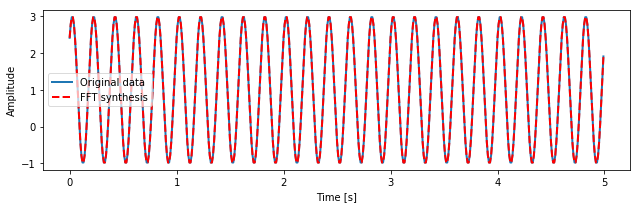

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(9, 3))
ax.plot(time, x, linewidth=2, label='Original data')
ax.plot(t, xfft, 'r--', linewidth=2, label='FFT synthesis')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')
ax.legend(framealpha=.7)
fig.tight_layout()

But employing the function `scipy.fftpack.fft` is simpler:

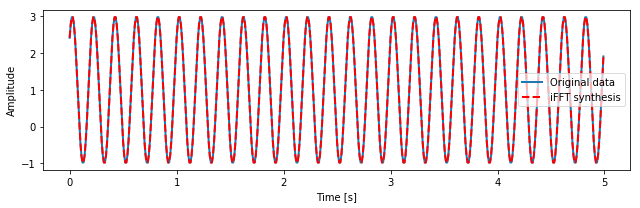

In [10]:
from scipy.fftpack import ifft

xfft2 = np.real(ifft(X))

fig, ax = plt.subplots(1, 1, figsize=(9, 3))
ax.plot(time, x, linewidth=2, label='Original data')
ax.plot(t, xfft2, 'r--', linewidth=2, label='iFFT synthesis')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')
ax.legend(framealpha=.7)
fig.tight_layout()

Another example:

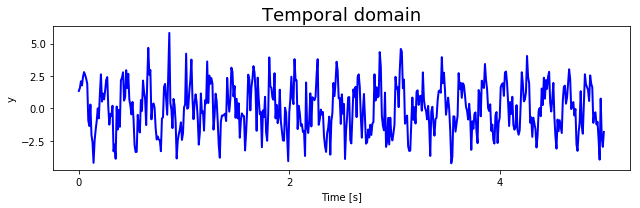

In [11]:
freq = 100.0
t = np.arange(0, 5, .01)
y = 2*np.sin(5*np.pi*2*t) + np.sin(2*np.pi*20*t) + np.random.randn(t.size) 

fig, ax = plt.subplots(1, 1, squeeze=True, figsize=(9, 3))

ax.set_title('Temporal domain', fontsize=18)
ax.plot(t, y, 'b', linewidth=2)
ax.set_xlabel('Time [s]')
ax.set_ylabel('y')
ax.locator_params(axis = 'both', nbins = 5)
fig.tight_layout()

In [14]:
# frequency content
N = y.size
yfft  = fft(y, N)
# Only the positive frequencies
yfft  = 2*np.abs(yfft)/N
freqs = fftfreq(N, 1./freq)
freqs = freqs[:int(np.floor(N/2))]
yfft  = yfft[:int(np.floor(N/2))]

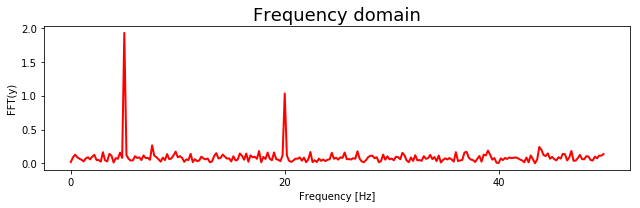

In [15]:
fig, ax = plt.subplots(1, 1, squeeze=True, figsize=(9, 3))
ax.set_title('Frequency domain', fontsize=18)
ax.plot(freqs, yfft, 'r',  linewidth=2)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('FFT(y)')
ax.locator_params(axis = 'both', nbins = 5)
fig.tight_layout()

### FFTW - the Fastest Fourier Transform in the West

[FFTW](http://www.fftw.org/) is a free collection of fast C routines for computing the DFT. Indeed, FFTW is probably the fastest FFT library in the market and you should use it in case speed is a major concern. To use it in Python, you will need to install FFTW and the Python wrapper around FFTW, [pyfftw](https://pypi.python.org/pypi/pyFFTW).

## Power spectral density 

The function `psd.py` (code at the end of this text) estimates power spectral density characteristics using Welch's method. This function is just a wrap of the scipy.signal.welch function with estimation of some frequency characteristics and a plot. The `psd.py` returns power spectral density data, frequency percentiles of the power spectral density (for example, Fpcntile[50] gives the median power frequency in Hz); mean power frequency; maximum power frequency; total power, and plots power spectral density data.

Let's exemplify the use of `psd.py`.

In [16]:
from psd import psd
help(psd)

Help on function psd in module psd:

psd(x, fs=1.0, window='hanning', nperseg=None, noverlap=None, nfft=None, detrend='constant', show=True, ax=None, scales='linear', xlim=None, units='V')
    Estimate power spectral density characteristcs using Welch's method.
    
    This function is just a wrap of the scipy.signal.welch function with
    estimation of some frequency characteristcs and a plot. For completeness,
    most of the help from scipy.signal.welch function is pasted here.
    
    Welch's method [1]_ computes an estimate of the power spectral density
    by dividing the data into overlapping segments, computing a modified
    periodogram for each segment and averaging the periodograms.
    
    Parameters
    ----------
    x : array_like
        Time series of measurement values
    fs : float, optional
        Sampling frequency of the `x` time series in units of Hz. Defaults
        to 1.0.
    window : str or tuple or array_like, optional
        Desired window to use. S

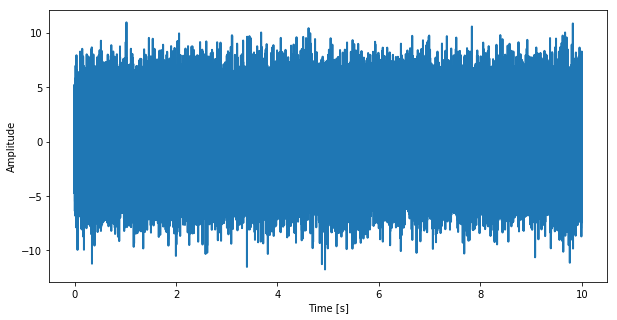

In [17]:
#Generate a test signal, a 2 Vrms sine wave at 1234 Hz, corrupted by
# 0.001 V**2/Hz of white noise sampled at 10 kHz and calculate the PSD:
fs = 10e3
N = 1e5
amp = 2*np.sqrt(2)
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)

plt.figure(figsize=(10, 5))
plt.plot(time, x, linewidth=2)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude');

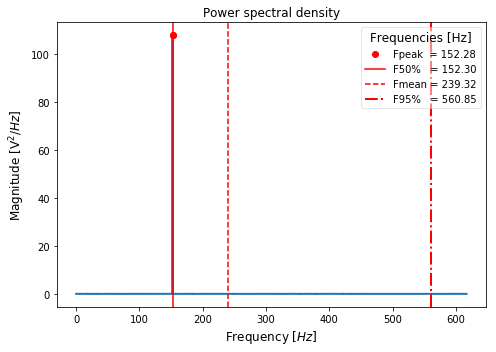

In [18]:
fpcntile, mpf, fmax, Ptotal, f, P = psd(x, fs=freq)

### Periodogram

In [19]:
import scipy
freq = 100.0
t = np.arange(0, 5, .01)
y = 2*np.sin(5*np.pi*2*t) + np.sin(2*np.pi*20*t) + np.random.randn(t.size) 
N = y.shape[0]

from scipy import signal, integrate
fp, Pp = signal.periodogram(y, freq, window='boxcar', nfft=N)
fw, Pw = signal.welch(y, freq, window='hanning', nperseg=N, noverlap=0, nfft=N)
# quick and simple PSD
P  = np.abs(scipy.fftpack.fft(y-np.mean(y),N))[:np.floor(N/2)]**2/N/freq; P[1:-1]=2*P[1:-1]
fs = np.linspace(0,freq/2,len(P))

TypeError: slice indices must be integers or None or have an __index__ method

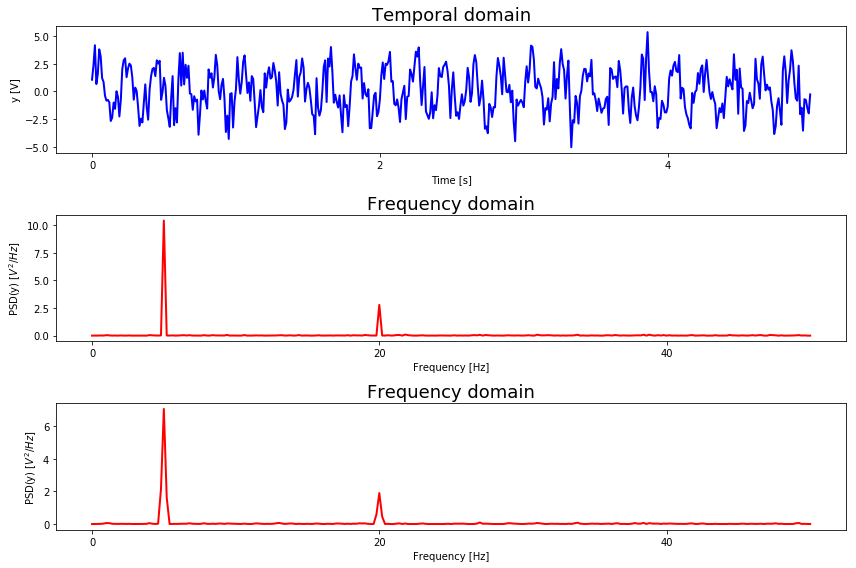

In [20]:
fig, (ax1,ax2,ax3) = plt.subplots(3, 1, squeeze=True, figsize=(12, 8))
ax1.set_title('Temporal domain', fontsize=18);
ax1.plot(t, y, 'b', linewidth=2)
ax1.set_xlabel('Time [s]'); ax1.set_ylabel('y [V]'); 
ax1.locator_params(axis = 'both', nbins = 5);
ax2.set_title('Frequency domain', fontsize=18);
ax2.plot(fp, Pp,'r',  linewidth=2)
ax2.set_xlabel('Frequency [Hz]'); ax2.set_ylabel('PSD(y) $[V^2/Hz]$');
ax2.locator_params(axis = 'both', nbins = 5);
ax3.set_title('Frequency domain', fontsize=18);
ax3.plot(fw, Pw,'r',  linewidth=2)
ax3.set_xlabel('Frequency [Hz]'); ax3.set_ylabel('PSD(y) $[V^2/Hz]$');
ax3.locator_params(axis = 'both', nbins = 5);
fig.tight_layout()

In [21]:
F, P = signal.welch(y, fs=freq, window='hanning', nperseg=N/2, noverlap=N/4, nfft=N/2)
A = integrate.cumtrapz(P, F)
fm = np.trapz(F * P, F)/np.trapz(P, F)
f50 = F[np.nonzero(A >= 0.5*A[-1])[0][0]]
f95 = F[np.nonzero(A >= .95*A[-1])[0][0]]
fmax = F[np.argmax(P)]

$$ F_{mean} = \frac{ \sum_{i=1}^{N} F_i*P_i }{ \sum_{i=1}^{N} P_i } $$

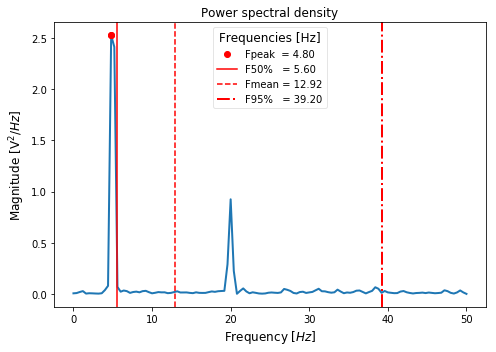

In [22]:
from psd import psd
fp, mf, fmax, Ptot, F, P = psd(y, fs=freq, scales='linear', units='V')

#### Short FFT

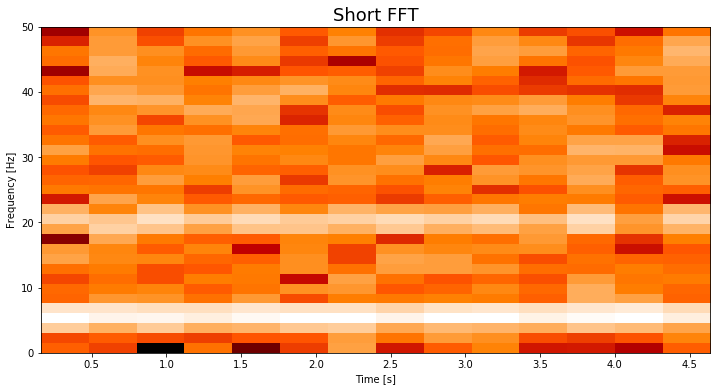

In [23]:
fig, ax1 = plt.subplots(1, 1, figsize=(12,6))
P, freqs, t, im = plt.specgram(y, NFFT=64, Fs=freq, noverlap = 32, cmap=plt.cm.gist_heat)
# P: array of shape (len(times), len(freqs)) of power,
# freqs: array of frequencies, 
# bins: time points the spectrogram is calculated over,
# im: matplotlib.image.AxesImage instance
ax1.set_title('Short FFT', fontsize=18);
ax1.set_xlabel('Time [s]'); ax1.set_ylabel('Frequency [Hz]');

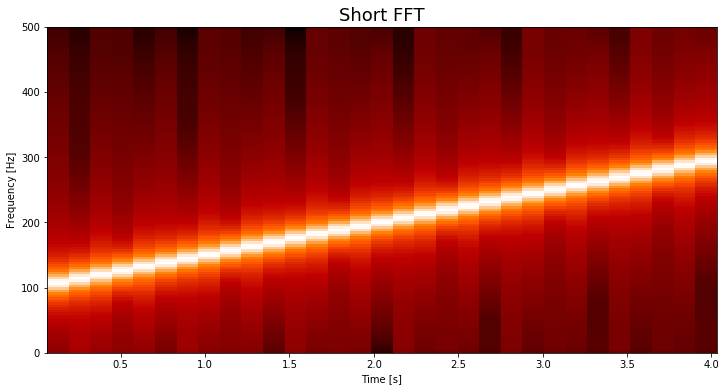

In [24]:
import scipy.signal
t = np.linspace(0, (2**12-1)/1000, 2**12)
c = scipy.signal.chirp(t, f0=100, f1=300, t1=t[-1], method='linear')
fig, ax1 = plt.subplots(1, 1, figsize=(12,6))
P, freqs, t, im = plt.specgram(c, NFFT=256, Fs=t.size/t[-1], noverlap = 128, cmap=plt.cm.gist_heat)
ax1.set_title('Short FFT', fontsize=18);
ax1.set_xlabel('Time [s]'); ax1.set_ylabel('Frequency [Hz]');

## Function psd.py

In [ ]:
# %load ./../functions/psd.py
#!/usr/bin/env python

"""Estimate power spectral density characteristcs using Welch's method."""

from __future__ import division, print_function
import numpy as np

__author__ = 'Marcos Duarte, https://github.com/demotu/BMC'
__version__ = 'tnorm.py v.1 2013/09/16'


def psd(x, fs=1.0, window='hanning', nperseg=None, noverlap=None, nfft=None,
        detrend='constant', show=True, ax=None, scales='linear', xlim=None,
        units='V'):
    """Estimate power spectral density characteristcs using Welch's method.

    This function is just a wrap of the scipy.signal.welch function with
    estimation of some frequency characteristcs and a plot. For completeness,
    most of the help from scipy.signal.welch function is pasted here.

    Welch's method [1]_ computes an estimate of the power spectral density
    by dividing the data into overlapping segments, computing a modified
    periodogram for each segment and averaging the periodograms.

    Parameters
    ----------
    x : array_like
        Time series of measurement values
    fs : float, optional
        Sampling frequency of the `x` time series in units of Hz. Defaults
        to 1.0.
    window : str or tuple or array_like, optional
        Desired window to use. See `get_window` for a list of windows and
        required parameters. If `window` is array_like it will be used
        directly as the window and its length will be used for nperseg.
        Defaults to 'hanning'.
    nperseg : int, optional
        Length of each segment.  Defaults to half of `x` length.
    noverlap: int, optional
        Number of points to overlap between segments. If None,
        ``noverlap = nperseg / 2``.  Defaults to None.
    nfft : int, optional
        Length of the FFT used, if a zero padded FFT is desired.  If None,
        the FFT length is `nperseg`. Defaults to None.
    detrend : str or function, optional
        Specifies how to detrend each segment. If `detrend` is a string,
        it is passed as the ``type`` argument to `detrend`. If it is a
        function, it takes a segment and returns a detrended segment.
        Defaults to 'constant'.
    show : bool, optional (default = False)
        True (1) plots data in a matplotlib figure.
        False (0) to not plot.
    ax : a matplotlib.axes.Axes instance (default = None)
    scales : str, optional
        Specifies the type of scale for the plot; default is 'linear' which
        makes a plot with linear scaling on both the x and y axis.
        Use 'semilogy' to plot with log scaling only on the y axis, 'semilogx'
        to plot with log scaling only on the x axis, and 'loglog' to plot with
        log scaling on both the x and y axis.
    xlim : float, optional
        Specifies the limit for the `x` axis; use as [xmin, xmax].
        The defaukt is `None` which sets xlim to [0, Fniquist].
    units : str, optional
        Specifies the units of `x`; default is 'V'.

    Returns
    -------
    Fpcntile : 1D array
        frequency percentiles of the power spectral density
        For example, Fpcntile[50] gives the median power frequency in Hz.
    mpf : float
        Mean power frequency in Hz.
    fmax : float
        Maximum power frequency in Hz.
    Ptotal : float
        Total power in `units` squared.
    f : 1D array
        Array of sample frequencies in Hz.
    P : 1D array
        Power spectral density or power spectrum of x.

    See Also
    --------
    scipy.signal.welch

    Notes
    -----
    An appropriate amount of overlap will depend on the choice of window
    and on your requirements.  For the default 'hanning' window an
    overlap of 50% is a reasonable trade off between accurately estimating
    the signal power, while not over counting any of the data.  Narrower
    windows may require a larger overlap.
    If `noverlap` is 0, this method is equivalent to Bartlett's method [2]_.

    References
    ----------
    .. [1] P. Welch, "The use of the fast Fourier transform for the
           estimation of power spectra: A method based on time averaging
           over short, modified periodograms", IEEE Trans. Audio
           Electroacoust. vol. 15, pp. 70-73, 1967.
    .. [2] M.S. Bartlett, "Periodogram Analysis and Continuous Spectra",
           Biometrika, vol. 37, pp. 1-16, 1950.

    Examples (also from scipy.signal.welch)
    --------
    #Generate a test signal, a 2 Vrms sine wave at 1234 Hz, corrupted by
    # 0.001 V**2/Hz of white noise sampled at 10 kHz and calculate the PSD:
    >>> from psd import psd
    >>> fs = 10e3
    >>> N = 1e5
    >>> amp = 2*np.sqrt(2)
    >>> freq = 1234.0
    >>> noise_power = 0.001 * fs / 2
    >>> time = np.arange(N) / fs
    >>> x = amp*np.sin(2*np.pi*freq*time)
    >>> x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
    >>> psd(x, fs=freq);
    """

    from scipy import signal, integrate

    if not nperseg:
        nperseg = np.ceil(len(x) / 2)
    f, P = signal.welch(x, fs, window, nperseg, noverlap, nfft, detrend)
    Area = integrate.cumtrapz(P, f, initial=0)
    Ptotal = Area[-1]
    mpf = integrate.trapz(f * P, f) / Ptotal  # mean power frequency
    fmax = f[np.argmax(P)]
    # frequency percentiles
    inds = [0]
    Area = 100 * Area / Ptotal  # + 10 * np.finfo(np.float).eps
    for i in range(1, 101):
        inds.append(np.argmax(Area[inds[-1]:] >= i) + inds[-1])
    fpcntile = f[inds]

    if show:
        _plot(x, fs, f, P, mpf, fmax, fpcntile, scales, xlim, units, ax)

    return fpcntile, mpf, fmax, Ptotal, f, P


def _plot(x, fs, f, P, mpf, fmax, fpcntile, scales, xlim, units, ax):
    """Plot results of the ellipse function, see its help."""
    try:
        import matplotlib.pyplot as plt
    except ImportError:
        print('matplotlib is not available.')
    else:
        if ax is None:
            fig, ax = plt.subplots(1, 1, figsize=(7, 5))
        if scales.lower() == 'semilogy' or scales.lower() == 'loglog':
            ax.set_yscale('log')
        if scales.lower() == 'semilogx' or scales.lower() == 'loglog':
            ax.set_xscale('log')
        ax.plot(f, P, linewidth=2)
        ylim = ax.get_ylim()
        ax.plot([fmax, fmax], [np.max(P), np.max(P)], 'ro',
                 label='Fpeak  = %.2f' % fmax)
        ax.plot([fpcntile[50], fpcntile[50]], ylim, 'r', lw=1.5,
                 label='F50%%   = %.2f' % fpcntile[50])
        ax.plot([mpf, mpf], ylim, 'r--', lw=1.5,
                 label='Fmean = %.2f' % mpf)
        ax.plot([fpcntile[95], fpcntile[95]], ylim, 'r-.', lw=2,
                 label='F95%%   = %.2f' % fpcntile[95])
        leg = ax.legend(loc='best', numpoints=1, framealpha=.5,
                        title='Frequencies [Hz]')
        plt.setp(leg.get_title(), fontsize=12)
        ax.set_xlabel('Frequency [$Hz$]', fontsize=12)
        ax.set_ylabel('Magnitude [%s$^2/Hz$]' % units, fontsize=12)
        ax.set_title('Power spectral density', fontsize=12)
        if xlim:
            ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        plt.tight_layout()
        plt.show()
